Index([u'userid', u'age', u'dob_day', u'dob_year', u'dob_month', u'gender',
       u'tenure', u'friend_count', u'friendships_initiated', u'likes',
       u'likes_received', u'mobile_likes', u'mobile_likes_received',
       u'www_likes', u'www_likes_received'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_lik

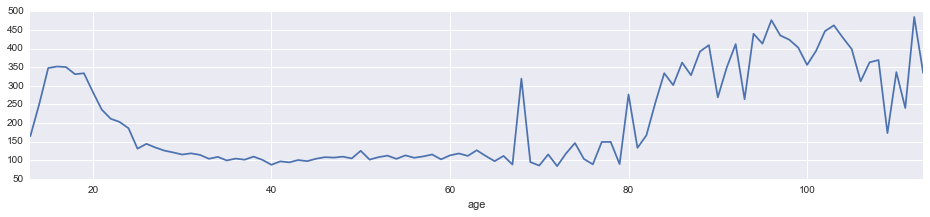

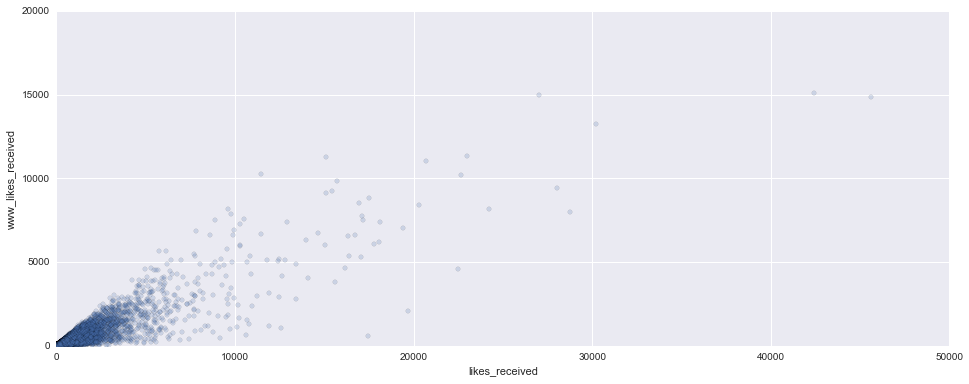

                    likes_received  www_likes_received
likes_received             1.00000             0.94799
www_likes_received         0.94799             1.00000
                    likes_received  www_likes_received
likes_received            1.000000            0.923523
www_likes_received        0.923523            1.000000


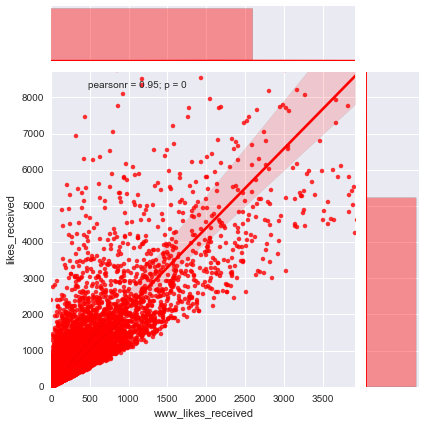

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ggplot import *
from ggplot import diamonds
%matplotlib inline

df = pd.read_csv('data/pseudo_facebook.tsv', sep='\t')
print df.columns
print df.info()
print df.head()

#d = df

#d = df
#d.friend_count = d.friend_count.apply(np.sqrt)
#g = sns.jointplot("age", "friend_count", data=d, xlim=(13,90), kind="scatter", color="r", alpha=0.05)
#plt.show()

# d.friendships_initiated = d.friendships_initiated.apply(np.sqrt)
# g = sns.jointplot("age", "friendships_initiated", data=d, xlim=(13,90), kind="scatter", color="r", alpha=0.05)
# plt.show()

ag_v_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].mean())
print ag_v_fc
ag_v_fc.plot(figsize=(16,3))
plt.show()

avg_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].mean())
mdn_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].median())
p10_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].quantile(.1))
p90_fc = df.groupby('age').apply(lambda sdf: sdf['friend_count'].quantile(.9))

# print avg_fc.head()
# print mdn_fc.head()
# print p10_fc.head()
# print p90_fc.head()

# plt.hold(True)
# df.plot('age', 'friend_count', kind='scatter', alpha=0.01, ylim=((1,3000)), figsize=(16,6), logy=True)
# avg_fc.plot(figsize=(16,6), logy=True)
# mdn_fc.plot(figsize=(16,6), color='black', logy=True)
# p10_fc.plot(figsize=(16,6), color='red', logy=True)
# p90_fc.plot(figsize=(16,6), color='red', logy=True)
# plt.show()

#print (pd.Series(avg_fc.index)).corr(avg_fc)
#print df[['age','friend_count']].corr()

df.plot('likes_received', 'www_likes_received', kind='scatter', alpha=0.2, figsize=(16,6), xlim=((0,50000)), ylim=((0,20000)))
plt.show()

print df[['likes_received','www_likes_received']].corr()
print df[['likes_received','www_likes_received']].corr(method='spearman')

g = sns.jointplot("www_likes_received", "likes_received", data=df, kind="reg", color="r",
                  xlim=((0, df['www_likes_received'].quantile(.999))), ylim=((0, df['likes_received'].quantile(.999))))
plt.show()